In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout,GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D
from keras.applications import MobileNet



data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((32,32))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [2]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 32, 32, 3) (39209,)
(31367, 32, 32, 3) (7842, 32, 32, 3) (31367,) (7842,)


CNN Model


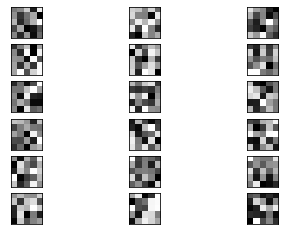

LeNet


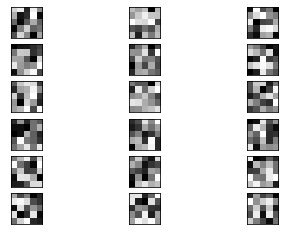

In [3]:
def drawFilters(model, l):
    filters, biases = model.layers[l].get_weights()
    # normalize filter values to 0-1 so we can visualize them
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    # plot first few filters
    n_filters, ix = 6, 1
    for i in range(n_filters):
        # get the filter
        f = filters[:, :, :, i]
        # plot each channel separately
        for j in range(3):
            # specify subplot and turn of axis
            ax = plt.subplot(n_filters, 3, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(f[:, :, j], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

#Building the model
def cnnModel():
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
    model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.25))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(43, activation='softmax'))
    return model

def mobileNet():
    base_model=MobileNet(input_shape=X_train.shape[1:],weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
    
    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    preds=Dense(43,activation='softmax')(x)
    model = Model(inputs=base_model.input,outputs=preds)
    return model

def leNet():
    #Instantiate an empty model
    model = Sequential()
    # C1 Convolutional Layer
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=X_train.shape[1:], padding="same"))
    # S2 Pooling Layer
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
    # C3 Convolutional Layer
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    # S4 Pooling Layer
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
    # C5 Fully Connected Convolutional Layer
    model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))
    #Flatten the CNN output so that we can connect it with fully connected layers
    model.add(Flatten())
    # FC6 Fully Connected Layer
    model.add(Dense(256, activation='relu'))
    #Output Layer with softmax activation
    model.add(Dense(43, activation='softmax'))
    return model


model1 = cnnModel()
model2 = mobileNet()
model3= leNet()

print('CNN Model')
drawFilters(model1, 0)
print('LeNet')
drawFilters(model3, 0)

model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
epochs = 15
history1 = model1.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
history2 = model2.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
history3 = model3.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model1.save("my_model1.h5")
model2.save("my_model2.h5")
model3.save("my_model3.h5")

Epoch 1/15
491/491 [==============================] - 3s 6ms/step - loss: 2.0683 - accuracy: 0.5110 - val_loss: 0.3881 - val_accuracy: 0.9081
Epoch 2/15
491/491 [==============================] - 3s 6ms/step - loss: 0.5614 - accuracy: 0.8406 - val_loss: 0.1596 - val_accuracy: 0.9649
Epoch 3/15
491/491 [==============================] - 3s 6ms/step - loss: 0.3554 - accuracy: 0.8965 - val_loss: 0.1163 - val_accuracy: 0.9695
Epoch 4/15
491/491 [==============================] - 3s 6ms/step - loss: 0.2684 - accuracy: 0.9223 - val_loss: 0.1356 - val_accuracy: 0.9625
Epoch 5/15
491/491 [==============================] - 3s 6ms/step - loss: 0.2041 - accuracy: 0.9410 - val_loss: 0.0728 - val_accuracy: 0.9786
Epoch 6/15
491/491 [==============================] - 3s 6ms/step - loss: 0.1929 - accuracy: 0.9465 - val_loss: 0.0462 - val_accuracy: 0.9898
Epoch 7/15
491/491 [==============================] - 3s 6ms/step - loss: 0.1631 - accuracy: 0.9523 - val_loss: 0.0577 - val_accuracy: 0.9855
Epoch 

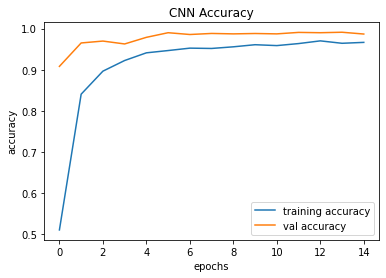

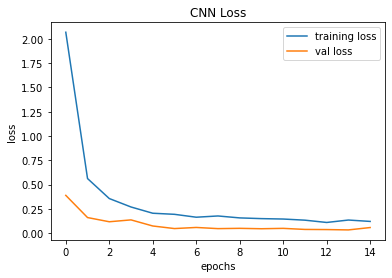

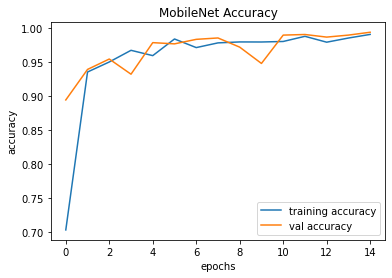

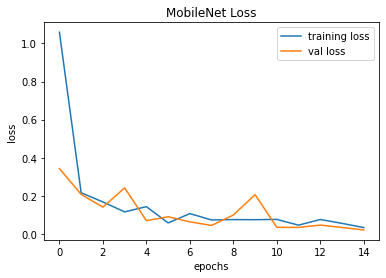

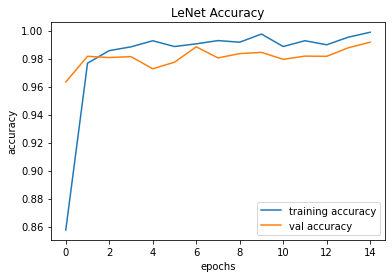

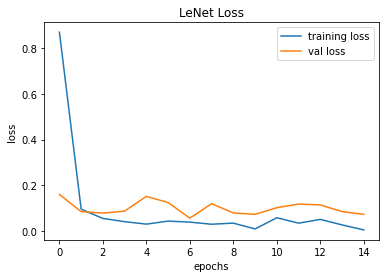

In [5]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history1.history['accuracy'], label='training accuracy')
plt.plot(history1.history['val_accuracy'], label='val accuracy')
plt.title('CNN Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history1.history['loss'], label='training loss')
plt.plot(history1.history['val_loss'], label='val loss')
plt.title('CNN Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(history2.history['accuracy'], label='training accuracy')
plt.plot(history2.history['val_accuracy'], label='val accuracy')
plt.title('MobileNet Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(history2.history['loss'], label='training loss')
plt.plot(history2.history['val_loss'], label='val loss')
plt.title('MobileNet Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.figure(4)
plt.plot(history3.history['accuracy'], label='training accuracy')
plt.plot(history3.history['val_accuracy'], label='val accuracy')
plt.title('LeNet Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(5)
plt.plot(history3.history['loss'], label='training loss')
plt.plot(history3.history['val_loss'], label='val loss')
plt.title('LeNet Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [6]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((32,32))
    data.append(np.array(image))

X_test=np.array(data)

pred1 = np.argmax(model1.predict(X_test), axis=-1)
pred2 = np.argmax(model2.predict(X_test), axis=-1)
pred3 = np.argmax(model3.predict(X_test), axis=-1)
#Accuracy with the test data

print("CNN Model: ",accuracy_score(labels, pred1))
print("MobileNet Model: ",accuracy_score(labels, pred2))
print("LeNet Model: ",accuracy_score(labels, pred3))

CNN Model:  0.9515439429928741
MobileNet Model:  0.9581947743467933
LeNet Model:  0.9456848772763262


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        25632     
Total params: 28,064
Trainable params: 28,064
Non-trainable params: 0
_________________________________________________________________


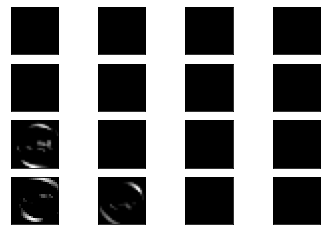

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 33, 33, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 16, 16, 32)        864       
Total params: 864
Trainable params: 864
Non-trainable params: 0
_________________________________________________________________


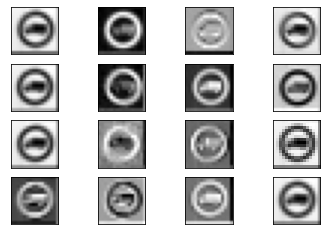

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 6)         456       
_________________________________________________________________
average_pooling2d (AveragePo (None, 31, 31, 6)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 16)        2416      
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


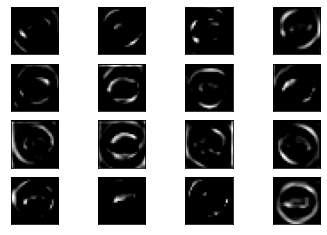

In [7]:
def drawFeatureMap(model, img, l):
    model_temp = Model(inputs=model.inputs, outputs=model.layers[l].output)
    model_temp.summary()
    feature_maps = model_temp.predict(img)
    row = 4
    col = 4
    ix = 1
    for _ in range(row):
        for _ in range(col):
            # specify subplot and turn of axis
            ax = plt.subplot(row, col, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
            ix += 1
    # show the figure
    plt.show()

drawFeatureMap(model1, X_test, 1)
drawFeatureMap(model2, X_test, 2)
drawFeatureMap(model3, X_test, 2)